## 1b. Calculate <i>P<sup>v</sup></i><sub>sat</sub> for analyses from a csv file using default options

This time, instead of creating a dataframe in a cell for the analysis, we'll read it in from a spreadsheet. 

## Setting things up
You need to install VolFe once on your machine, if you haven't yet. Then we need to import a few Python packages (including VolFe). 

In [1]:
# Install VolFe on your machine. Don't remove the # from this line!
# pip install VolFe # Remove the first # in this line if you have not installed VolFe on your machine before.

# import python packages
import pandas as pd
import matplotlib.pyplot as plt
import VolFe as vf

We'll use the examples_marianas_wT csv in files and use all the default options again. The data in this file are from Brounce et al. (2014, 2016) and Kelley & Cottrell (2012).

In [6]:
# Read csv to define melt composition
my_analyses = pd.read_csv("../files/example_marianas_wT.csv") 

There are a few analyses in the csv. First, we will tell the function to stop after the first analysis by saying last_row=1:

In [7]:
# runs the calculation
vf.calc_Pvsat(my_analyses,last_row=1)

,sample,T_C,P_bar,SiO2_wtpc,TiO2_wtpc,Al2O3_wtpc,FeOT_wtpc,MnO_wtpc,MgO_wtpc,CaO_wtpc,...,KHOSg opt,KOSg opt,KOSg2 opt,KCOg opt,KCOHg opt,KOCSg opt,KCOs opt,carbonylsulfide opt,density opt,Date
0,TN273-01D-01-01,1200,337.809345,57.03956,1.661735,15.536223,9.479899,0.240251,2.963094,6.496784,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-12 10:05:32.849042


To run all the analyses, simply don't tell it the last row you want to run. All analyses must be in consequitive rows for this to work! As it finishes each calculation, it will return the index number, the sample name, and Pvsat. At the end it will show the dataframe of the full results.

In [8]:
# runs the calculation
results = vf.calc_Pvsat(my_analyses)

And we can plot these against the volatile content.
This shows that the pressure is mostly controlled by CO2 and H2O content, which are correlated.

(4500.0, 0.0)

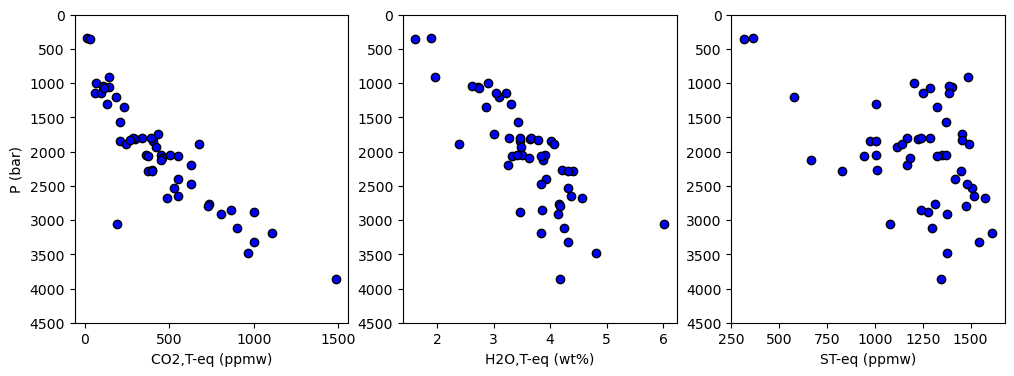

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

# Plotting data

data1 = results

ax1.plot(data1['CO2T-eq_ppmw'],
         data1['P_bar'], 'ok', mfc='blue')
ax2.plot(data1['H2OT-eq_wtpc'],
         data1['P_bar'], 'ok', mfc='blue')
ax3.plot(data1['ST_ppmw'],
         data1['P_bar'], 'ok', mfc='blue')

ax1.set_xlabel('CO2,T-eq (ppmw)')
ax2.set_xlabel('H2O,T-eq (wt%)')
ax3.set_xlabel('ST-eq (ppmw)')
ax1.set_ylabel('P (bar)')
ax1.set_ylim([4500, 0])
ax2.set_ylim([4500, 0])
ax3.set_ylim([4500, 0])

If we only want to run row 4 (Agr07-4) through 18 (AGR19-02-16) in that spreadsheet, we simply specify the first and last rows we want to run (remembering that row 2 in a spreadsheet - i.e., the first analysis under the headings - is actually row 0 in the dataframe).

In [6]:
vf.calc_Pvsat(my_analyses,first_row=2, last_row=17)

,sample,T_C,P_bar,SiO2_wtpc,TiO2_wtpc,Al2O3_wtpc,FeOT_wtpc,MnO_wtpc,MgO_wtpc,CaO_wtpc,...,KHOSg opt,KOSg opt,KOSg2 opt,KCOg opt,KCOHg opt,KOCSg opt,KCOs opt,carbonylsulfide opt,density opt,Date
0,Agr07-4,1200,3061.065011,45.451495,0.650021,17.270568,10.190335,0.230008,5.540182,12.320405,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-12 09:20:27.835152
0,Agr07-9,1200,2278.508224,48.25551,0.760875,17.309912,9.150526,0.180207,4.825551,12.093912,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-12 09:20:28.377421
0,Agr07-15A,1200,2043.061869,47.769532,0.810841,16.747365,10.681075,0.220228,5.665875,11.34176,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-12 09:20:28.975379
0,Agr07-15B,1200,1570.778012,48.020961,0.860914,16.847879,10.43107,0.190202,5.555896,11.342036,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-12 09:20:29.544637
0,Agr04-13,1200,1841.206482,51.009753,0.801095,16.742895,8.842091,0.200274,4.866655,10.173912,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-12 09:20:30.025025
0,Agr04-14,1200,903.659354,48.748373,0.780775,18.618475,9.319247,0.170169,5.355314,12.071979,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-12 09:20:30.595259
0,AGR19-02-4,1200,2198.750989,47.941949,0.655476,17.667136,9.729727,0.266287,4.700994,13.099285,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-12 09:20:31.105666
0,AGR19-02-7,1200,1055.880248,47.730139,0.852868,18.570182,9.472925,0.172604,4.406484,12.853936,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-12 09:20:31.540805
0,AGR19-02-10,1200,2678.886996,47.019198,0.74585,18.196695,9.185193,0.153257,4.689659,12.914443,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-12 09:20:32.327736
0,AGR19-02-11,1200,1938.722301,47.917169,0.777976,18.077701,9.315237,0.214967,4.729274,12.713763,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-12 09:20:32.902724
